In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
#load data from npy
data = np.load('/dice/users/pc24403/BPGGSZ/sim_fit/contours.npy', allow_pickle=True).item()

In [156]:
xp_yp = data['0_1']
xp_xm = data['0_2']
xp_ym = data['0_3']
xp_xxi = data['0_4']
xp_yxi = data['0_5']
yp_xm = data['1_2']
yp_ym = data['1_3']
yp_xxi = data['1_4']
yp_yxi = data['1_5']
xm_ym = data['2_3']
xm_xxi = data['2_4']
xm_yxi = data['2_5']
ym_xxi = data['3_4']
ym_yxi = data['3_5']
xxi_yxi = data['4_5']


In [157]:
# Find the indices of the minimum log-likelihood value
min_idx = np.unravel_index(np.argmin(xp_yp[2]), xp_yp[2].shape)
min_theta1 = xp_yp[0][min_idx[0]]
min_theta2 = xp_yp[1][min_idx[1]]
min_log_likelihood = xp_yp[2][min_idx]

print(f"Minimum Log-Likelihood at theta1={min_theta1}, theta2={min_theta2}: {min_log_likelihood}")



Minimum Log-Likelihood at theta1=-0.07562010316097899, theta2=-0.0024651157664540707: -3520186.044942047


/tmp/ipykernel_250692/2815344615.py:55: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  arc = Arc((0,0), 0.025, 0.025, 0, 115-72, 115+72, lw=0.5)


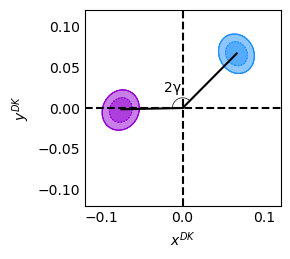

In [158]:
# Create coordinate grids
X, Y = (xp_yp[0], xp_yp[1])
X2, Y2 = (xm_ym[0], xm_ym[1])
Z1 = xp_yp[2]
Z2 = xm_ym[2]

Z1 = (Z1-np.min(Z1))
Z2 = (Z2-np.min(Z2))

# Plotting
fig, ax = plt.subplots()

# Contour levels (adjust as needed)
levels = [0, 2.30]
levels2 = [0, 6.18]
levels3 = [2.3, 6.18]
# Contour plots for the loaded datasets
contour1 = ax.contour(X, Y, Z1, levels3, colors='darkviolet', linewidths=0.8,linestyles=[':', '-'])
contour1 = ax.contour(X, Y, Z1, levels3, colors='darkviolet',linewidths=0.8, linestyles=[':', '-'])
contour2 = ax.contour(X2, Y2, Z2, levels3, colors='dodgerblue',linewidths=0.8, linestyles=[':', '-'])
contour2 = ax.contour(X2, Y2, Z2, levels3, colors='dodgerblue',linewidths=0.8, linestyles=[':', '-'])

# Fill between contour levels
ax.contourf(X, Y, Z1, levels, colors='darkviolet', alpha=0.5)
ax.contourf(X, Y, Z1, levels2, colors='darkviolet', alpha=0.5)

ax.contourf(X2, Y2, Z2, levels, colors='dodgerblue', alpha=0.5)
ax.contourf(X2, Y2, Z2, levels2, colors='dodgerblue', alpha=0.5)


# Customizing the plot
ax.axhline(0, color='black', linestyle='--')
ax.axvline(0, color='black', linestyle='--')
ax.set_xlabel('$x^{DK}$')
ax.set_ylabel('$y^{DK}$')
ax.aspect="equal"

# Adding a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='darkviolet', lw=2, label='$B^-$'),
                   Line2D([0], [0], color='dodgerblue', lw=2, label='$B^+$')]

# Automatically find the centers of each contour
def find_center(data, x, y):
    total = np.sum(data)
    x_center = np.sum(x * data) / total
    y_center = np.sum(y * data) / total
    return x_center, y_center

# Find centers
x_center_minus, y_center_minus = find_center(Z1, X, Y)
x_center_plus, y_center_plus = find_center(Z2, X2, Y2)

# Plot lines from origin to centers
arc = Arc((0,0), 0.025, 0.025, 0, 115-72, 115+72, lw=0.5)

# Find centers
ax.add_patch(arc)
ax.plot([0, x_center_minus], [0, y_center_minus], color='black')
ax.plot([0, x_center_plus], [0, y_center_plus], color='black')



# Adding annotations and lines
ax.text(0.-0.012, 0.025, '2γ', horizontalalignment='center', verticalalignment='center')


# Setting axis limits
ax.set_xlim(-0.12, 0.12)
ax.set_ylim(-0.12, 0.12)

plt.show()

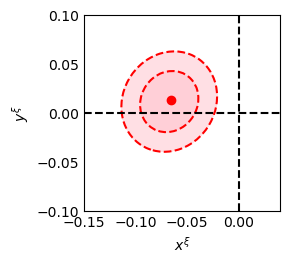

In [159]:
# Create coordinate grids
X, Y = (xxi_yxi[0], xxi_yxi[1])
Z = xxi_yxi[2]


Z = (Z - np.min(Z))


# Plotting
fig, ax = plt.subplots()
fig.subplots_adjust(wspace=0.45)
# Contour levels (adjust as needed)
levels = 20
# Contour plots for the loaded datasets
contour1 = ax.contour(X, Y, Z, levels=[0, 2.30], colors='red', linestyles='dashed')
contour1 = ax.contour(X, Y, Z, levels=[0, 6.18], colors='red', linestyles='dashed')



# Fill between contour levels
ax.contourf(X, Y, Z, levels=[0, 2.30], colors=['#FFC0CB', '#FF69B4'], alpha=0.5)
ax.contourf(X, Y, Z, levels=[0, 6.18], colors=['#FFC0CB', '#FF69B4'], alpha=0.5)

# Customizing the plot
ax.axhline(0, color='black', linestyle='--')
ax.axvline(0, color='black', linestyle='--')
ax.set_xlabel('$x^{\\xi}$')
ax.set_ylabel('$y^{\\xi}$')
ax.aspect="equal"

# Adding a legend
from matplotlib.lines import Line2D

# Automatically find the centers of each contour
def find_center(data, x, y):
    total = np.sum(data)
    x_center = np.sum(x * data) / total
    y_center = np.sum(y * data) / total
    return x_center, y_center

# Find centers
x_center_minus, y_center_minus = find_center(Z1, X, Y)


# Add centers as points
ax.plot(x_center_minus, y_center_minus, 'ro')

# Adding annotations and lines

# Setting axis limits
ax.set_xlim(-0.15, 0.04)
ax.set_ylim(-0.1, 0.1)

plt.show()

In [173]:
Z=-xxi_yxi[2]



array([[15.07401056, 15.07401119, 15.07401178, ..., 15.07400889,
        15.07400815, 15.07400738],
       [15.07401116, 15.07401179, 15.07401239, ..., 15.07400962,
        15.07400889, 15.07400812],
       [15.07401173, 15.07401236, 15.07401296, ..., 15.07401033,
        15.07400959, 15.07400883],
       ...,
       [15.07400877, 15.07400954, 15.07401028, ..., 15.07401296,
        15.07401236, 15.07401173],
       [15.07400806, 15.07400883, 15.07400957, ..., 15.07401239,
        15.07401179, 15.07401116],
       [15.07400731, 15.07400808, 15.07400883, ..., 15.07401179,
        15.07401119, 15.07401056]])

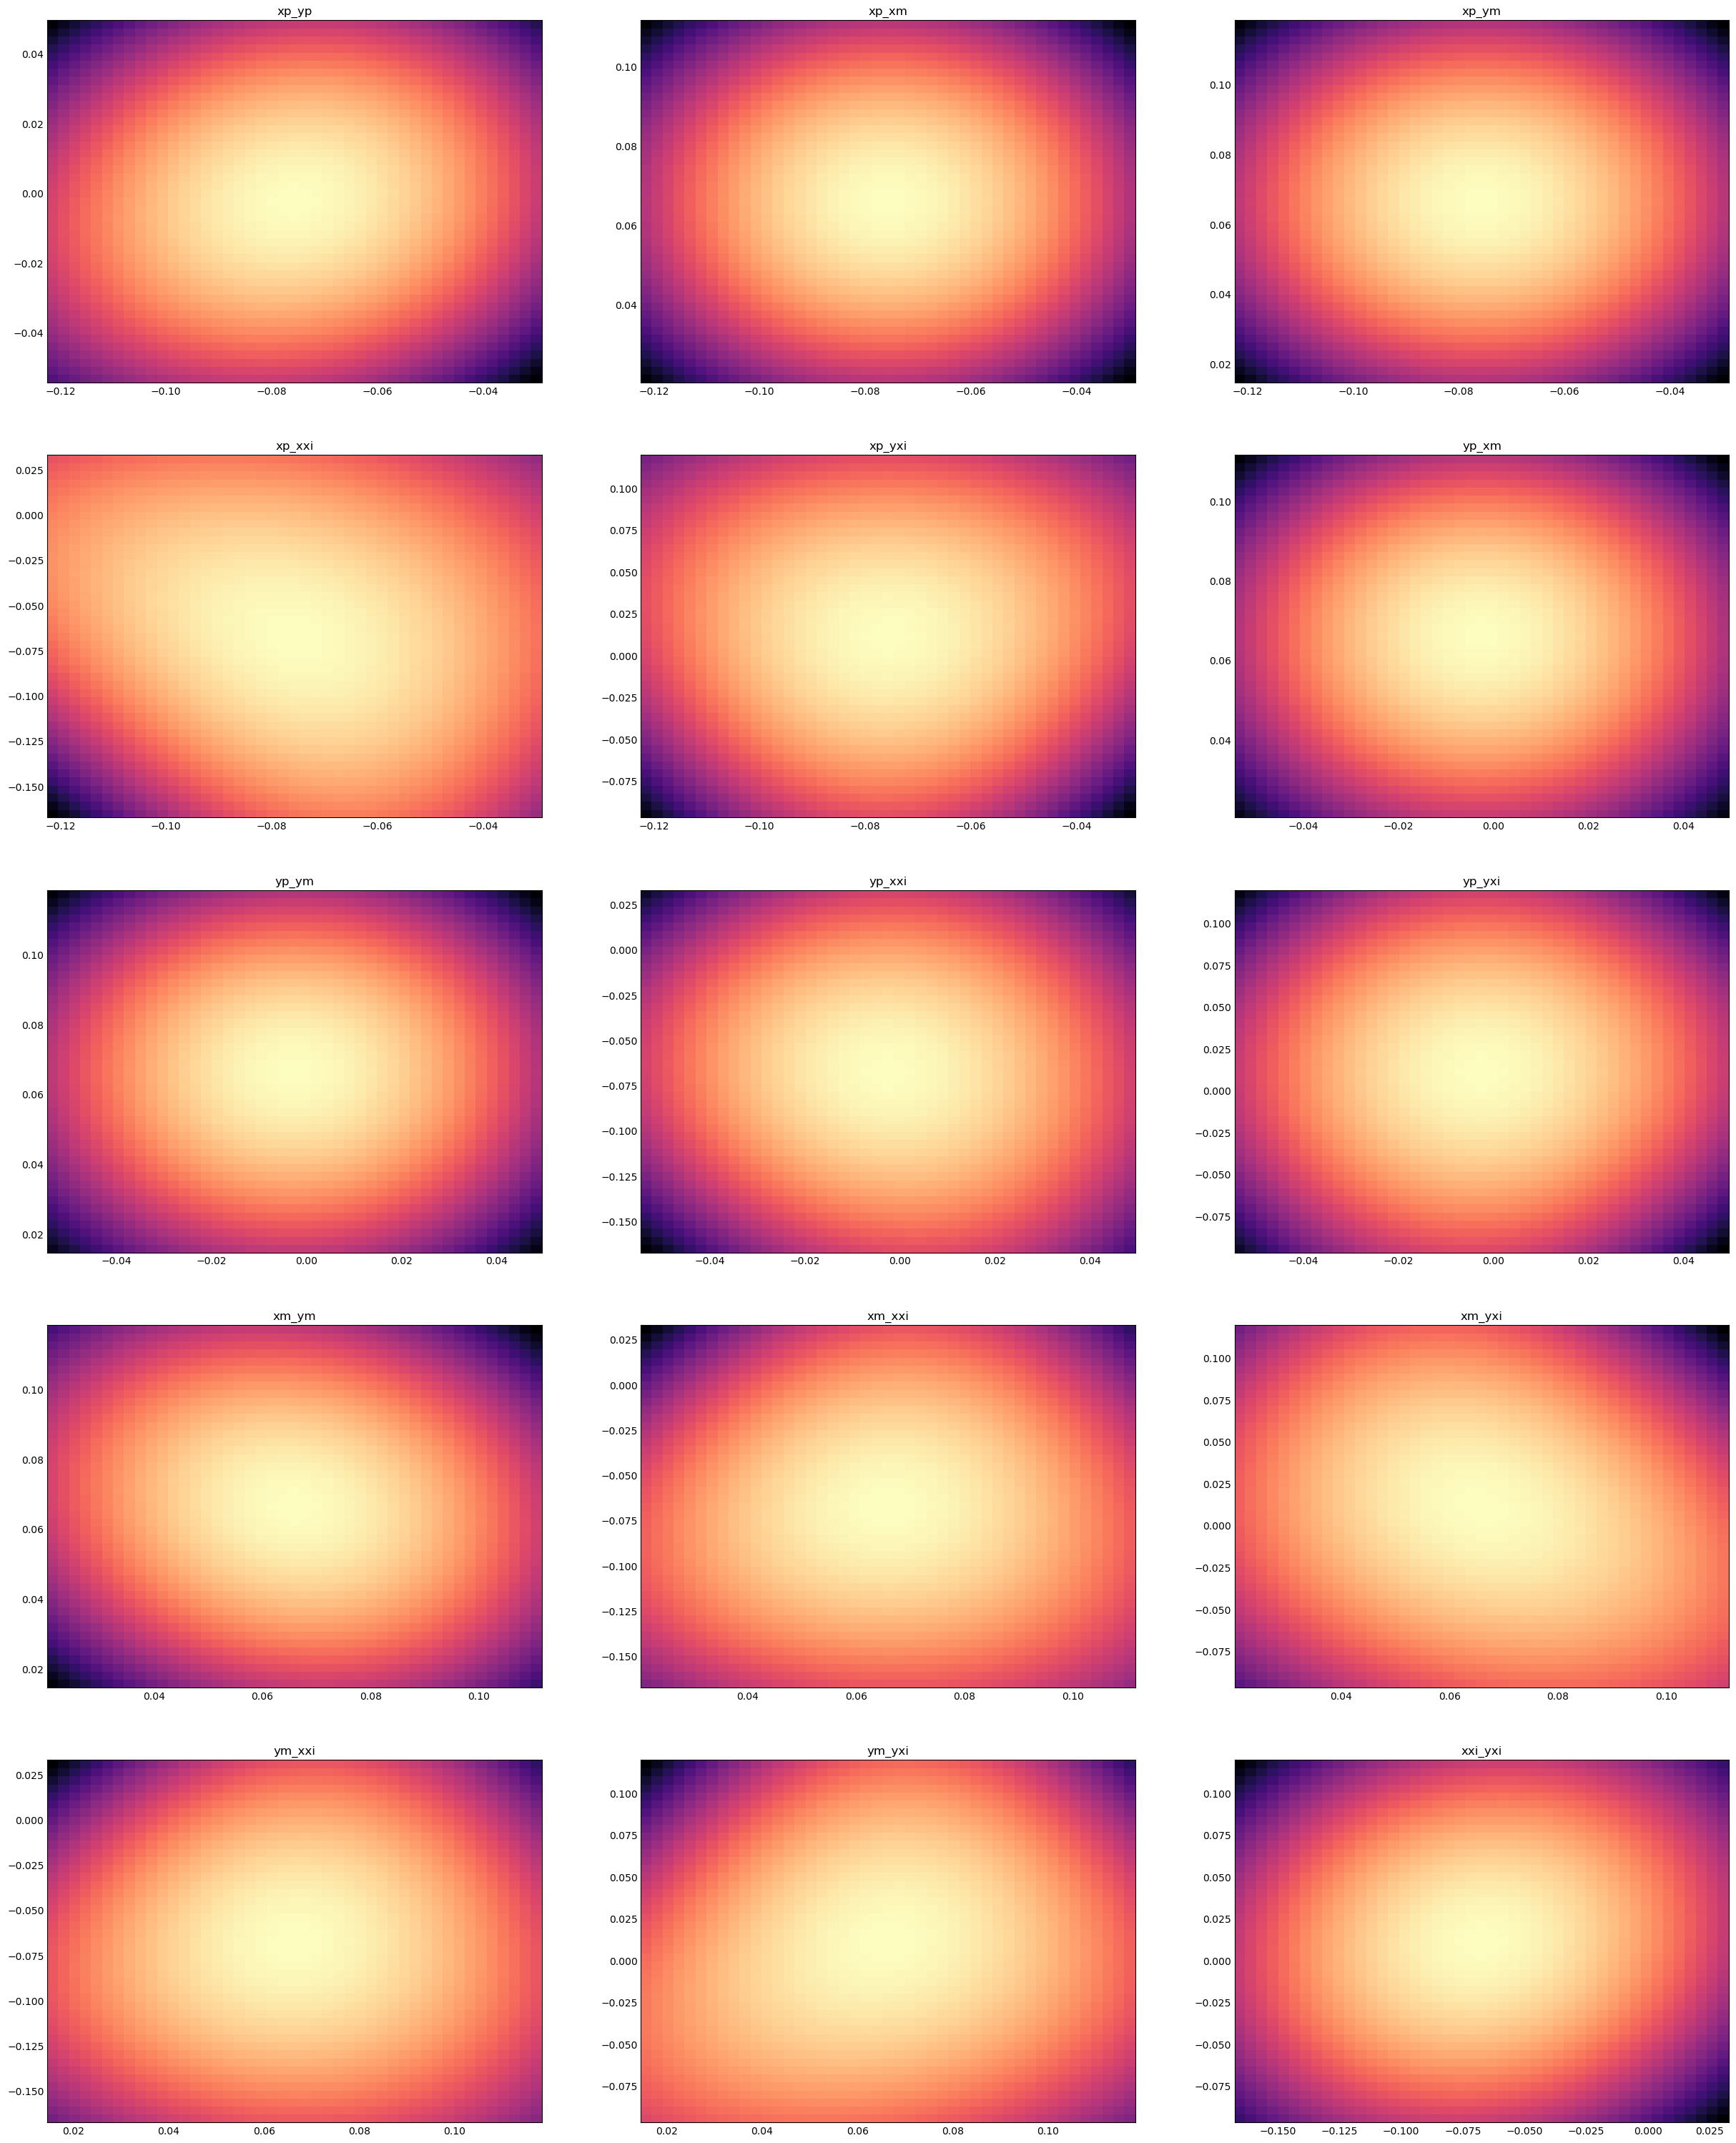

In [189]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(8*3, 6*5))

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

name_list = ['xp_yp', 'xp_xm', 'xp_ym', 'xp_xxi', 'xp_yxi', 'yp_xm', 'yp_ym', 'yp_xxi', 'yp_yxi', 'xm_ym', 'xm_xxi', 'xm_yxi', 'ym_xxi', 'ym_yxi', 'xxi_yxi']

i=0
for data in [xp_yp, xp_xm, xp_ym, xp_xxi, xp_yxi, yp_xm, yp_ym, yp_xxi, yp_yxi, xm_ym, xm_xxi, xm_yxi, ym_xxi, ym_yxi, xxi_yxi]:
    X, Y = (data[0], data[1])
    Z = np.log(-data[2])

    axs[i].pcolor(X, Y, Z, cmap='magma')
    axs[i].set_title(name_list[i])



    i+=1

plt.show()


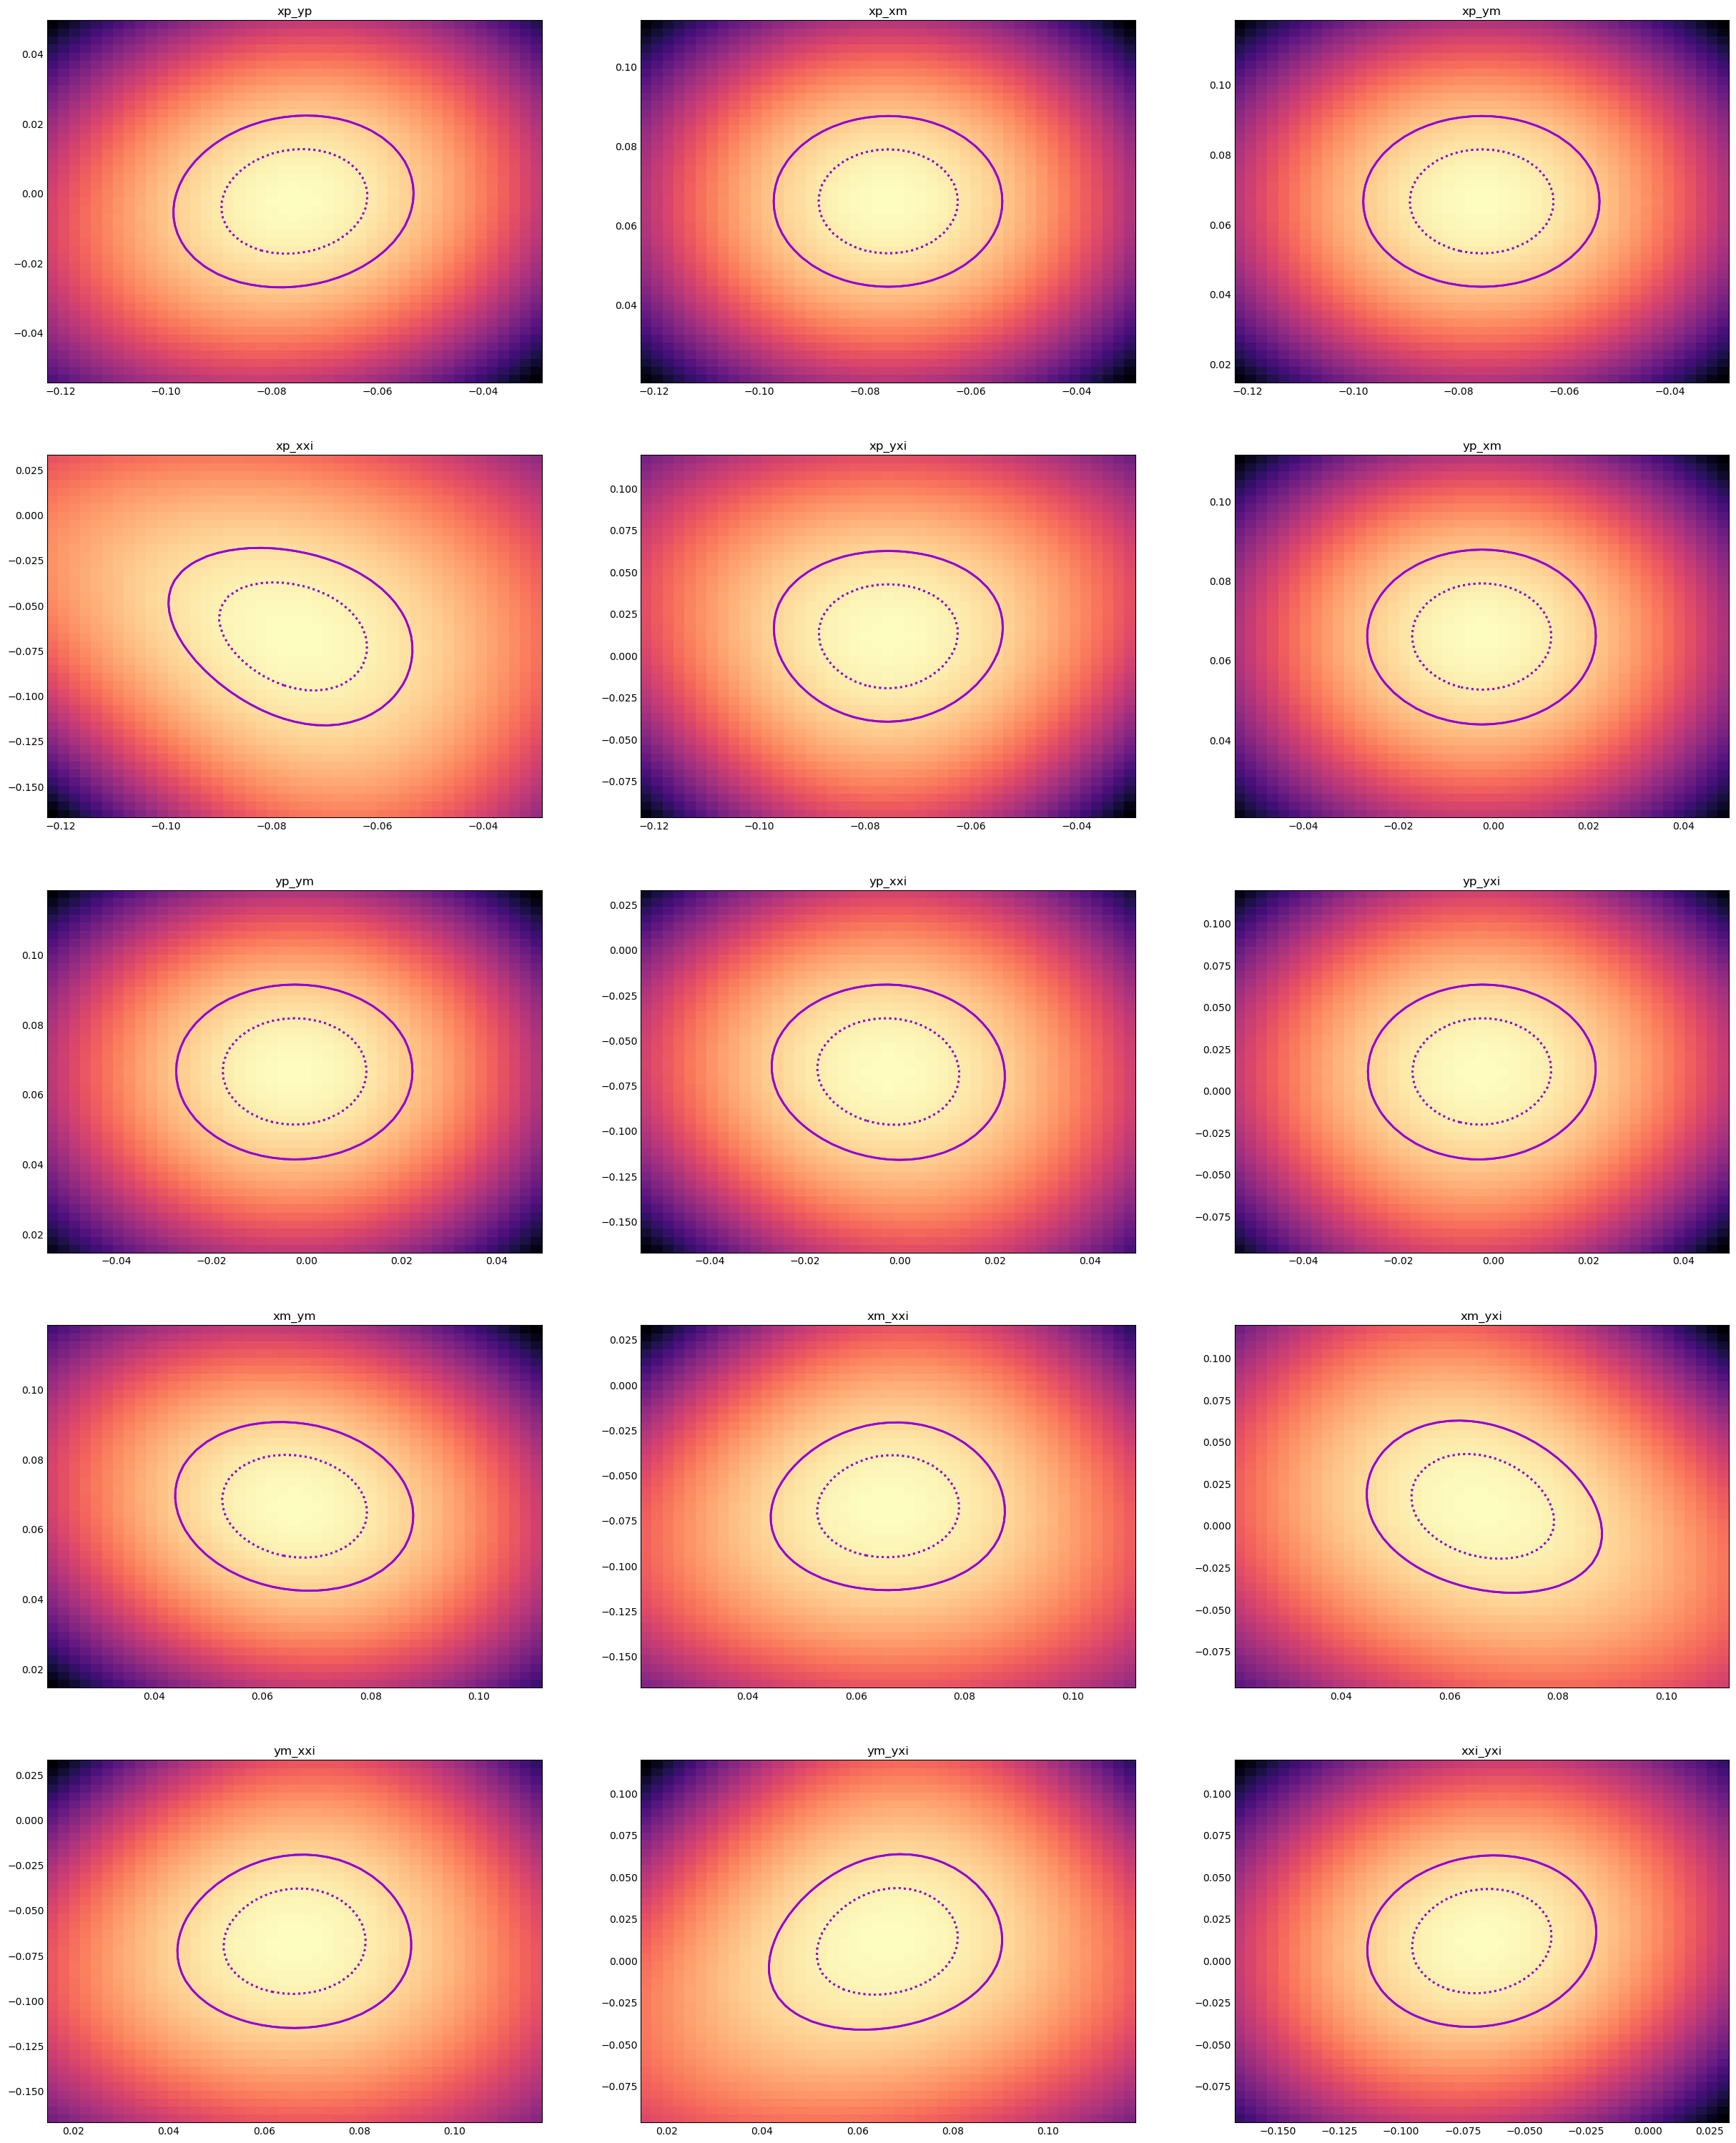

In [205]:



import matplotlib.pyplot as plt

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(8*3, 6*5))

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

name_list = ['xp_yp', 'xp_xm', 'xp_ym', 'xp_xxi', 'xp_yxi', 'yp_xm', 'yp_ym', 'yp_xxi', 'yp_yxi', 'xm_ym', 'xm_xxi', 'xm_yxi', 'ym_xxi', 'ym_yxi', 'xxi_yxi']

i=0
for data in [xp_yp, xp_xm, xp_ym, xp_xxi, xp_yxi, yp_xm, yp_ym, yp_xxi, yp_yxi, xm_ym, xm_xxi, xm_yxi, ym_xxi, ym_yxi, xxi_yxi]:
    X, Y = (data[0], data[1])
    Z = np.log(-data[2])

    axs[i].pcolor(X, Y, Z, cmap='magma')
    axs[i].set_title(name_list[i])
    # Contour levels (adjust as needed)
    levels = [0, 2.30]
    levels2 = [0, 6.18]
    levels3 = [2.3, 6.18]

    Z_alt = (data[2]- data[2].min())
    # Contour plots for the loaded datasets
    contour1 = axs[i].contour(X, Y, Z_alt, levels3, colors='darkviolet', linewidths=2,linestyles=[':', '-'])
    contour1 = axs[i].contour(X, Y, Z_alt, levels3, colors='darkviolet',linewidths=2, linestyles=[':', '-'])



    i+=1

plt.show()
fig.savefig('2D_Likelihoods.png',dpi=300)


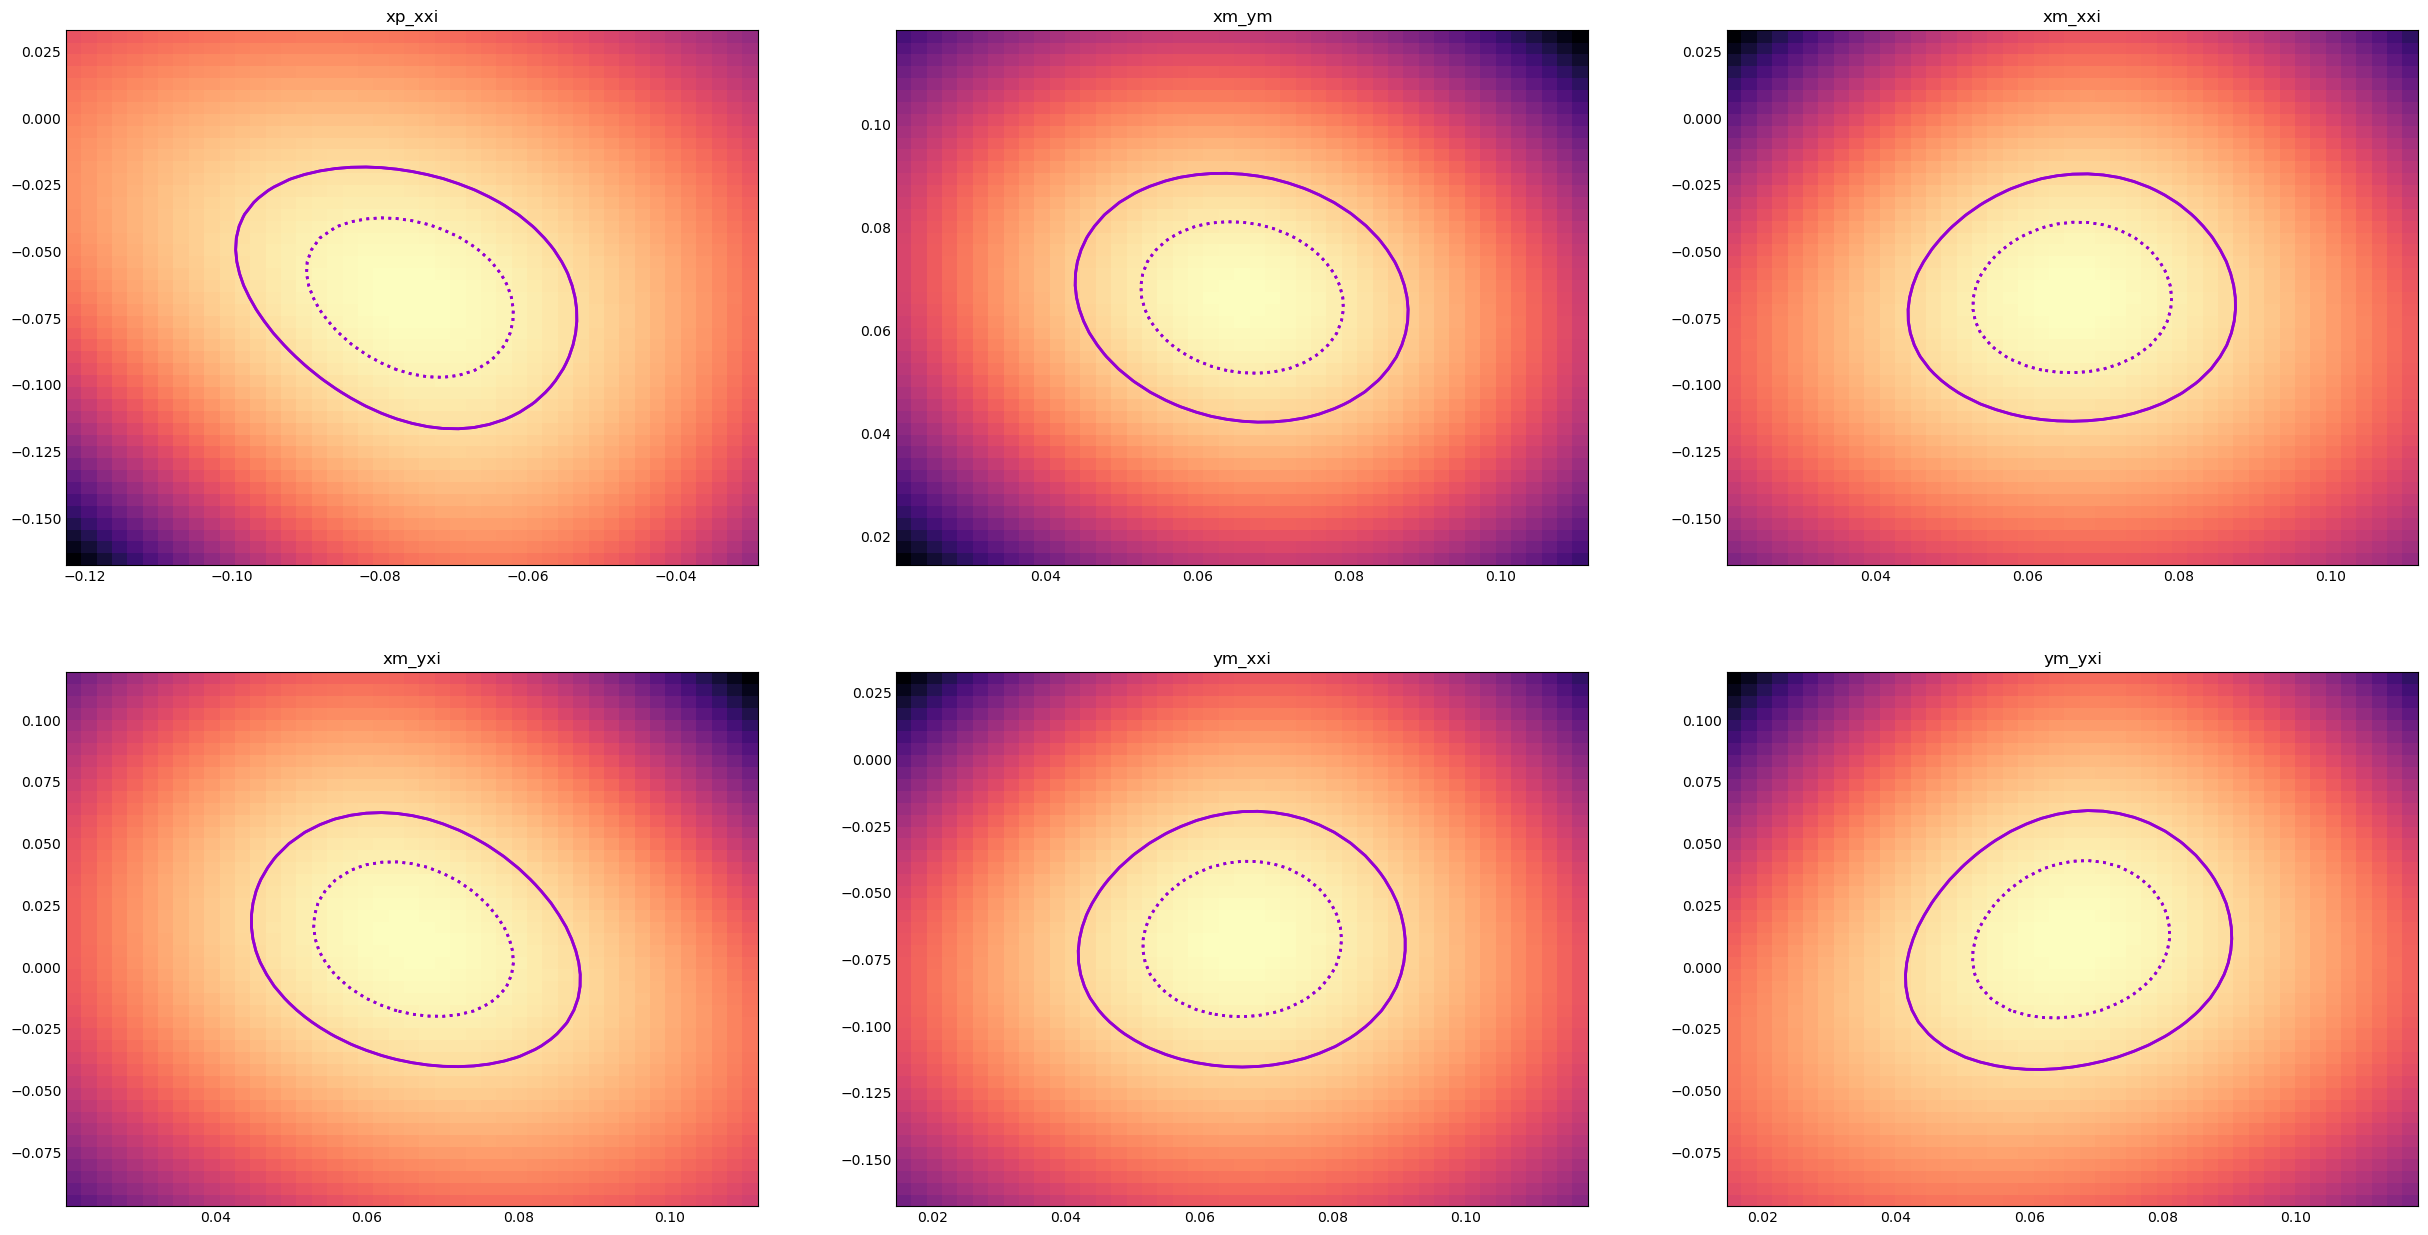

In [206]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8*3, 6*2))

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]

name_list = ['xp_xxi', 'xm_ym', 'xm_xxi', 'xm_yxi', 'ym_xxi', 'ym_yxi']

i=0
for data in [xp_xxi, xm_ym, xm_xxi, xm_yxi, ym_xxi, ym_yxi]:
    X, Y = (data[0], data[1])
    Z = np.log(-data[2])

    axs[i].pcolor(X, Y, Z, cmap='magma')
    axs[i].set_title(name_list[i])
    # Contour levels (adjust as needed)
    levels = [0, 2.30]
    levels2 = [0, 6.18]
    levels3 = [2.3, 6.18]

    Z_alt = (data[2]- data[2].min())
    # Contour plots for the loaded datasets
    contour1 = axs[i].contour(X, Y, Z_alt, levels3, colors='darkviolet', linewidths=2,linestyles=[':', '-'])
    contour1 = axs[i].contour(X, Y, Z_alt, levels3, colors='darkviolet',linewidths=2, linestyles=[':', '-'])



    i+=1

plt.show()
fig.savefig('2D_Likelihoods_selected.png',dpi=300)
